In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# import gmaps
import gmaps

# Import the API key.
from config import weather_api_key
from config import g_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#The zip() function returns a zip object, which is an iterator of tuples where the first item in each passed iterator is paired together, and then the second item in each passed iterator are paired together etc.
#If the passed iterators have different lengths, the iterator with the least items decides the length of the new iterator.

In [4]:
#let's unpack our lat_lngs zip object into a list, this way, we only need to create a set of random latitudes and longitudes once
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
#You can only unzip a zipped tuple once before it is removed from the computer's memory. Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

ancud cl
dibaya cd
sovetskiy ru
bairiki ki
upernavik gl
albany au
nanortalik gl
mount gambier au
puerto ayora ec
hilo us
punta arenas cl
bulolo pg
georgetown sh
tuktoyaktuk ca
mandera ke
mount isa au
grootfontein na
atuona pf
barrow us
carnarvon au
saskylakh ru
ancud cl
adrar dz
butaritari ki
talnakh ru
bowen au
punta arenas cl
iqaluit ca
atuona pf
kodiak us
mareeba au
punta arenas cl
saint george bm
alta floresta br
baytown us
yellowknife ca
hobart au
busselton au
nikolskoye ru
mar del plata ar
cockburn town tc
nampula mz
alice springs au
san jeronimito mx
provideniya ru
moindou nc
tuktoyaktuk ca
klaksvik fo
taoudenni ml
marystown ca
vardo no
yellowknife ca
new norfolk au
ribeira grande pt
bouna ci
upernavik gl
kodiak us
buala sb
punta arenas cl
yelnya ru
mataura pf
hofn is
ganzhou cn
hobart au
jamestown sh
chumikan ru
illoqqortoormiut gl
victoria sc
hobart au
atuona pf
saleaula ws
amderma ru
mattru sl
ixtapa mx
sao filipe cv
dikson ru
tambacounda sn
kloulklubed pw
port alfred za
belu

lazaro cardenas mx
kodiak us
chokurdakh ru
mar del plata ar
elverum no
hobart au
punta arenas cl
cape town za
guarapari br
saint-philippe re
attawapiskat ca
thompson ca
chokurdakh ru
meulaboh id
cabedelo br
airai pw
ponta do sol cv
rikitea pf
noumea nc
punta arenas cl
vaini to
cidreira br
atuona pf
busselton au
chauk mm
mataura pf
baijiantan cn
samalaeulu ws
mahebourg mu
malinyi tz
chipinge zw
ravar ir
solsvik no
kodiak us
lewistown us
busselton au
yandyki ru
cape town za
louisbourg ca
barcelos br
xai-xai mz
hilo us
mar del plata ar
rikitea pf
tasiilaq gl
borgo san lorenzo it
attawapiskat ca
samalaeulu ws
ilulissat gl
ribeira grande pt
kenai us
chokurdakh ru
cherskiy ru
punta arenas cl
sangerhausen de
hobart au
milas tr
erdenet mn
saint george bm
puerto ayora ec
carutapera br
balabac ph
todos santos mx
rikitea pf
saskylakh ru
carsamba tr
tiksi ru
puerto ayora ec
busselton au
saint-philippe re
anadyr ru
mandurah au
guadalupe y calvo mx
burgersdorp za
ushuaia ar
illoqqortoormiut gl
vaini

beidao cn
mehamn no
u thong th
port alfred za
port blair in
mataura pf
hun ly
albany au
dikson ru
kenai us
gamba ga
illoqqortoormiut gl
taolanaro mg
taolanaro mg
talaya ru
forecariah gn
ushuaia ar
avarua ck
illoqqortoormiut gl
bubaque gw
curuguaty py
general pico ar
namatanai pg
shunyi cn
baherden tm
hermanus za
kapaa us
ndele cf
carmen cr
urdzhar kz
east london za
pangnirtung ca
aksarka ru
albany au
saldanha za
raudeberg no
modasa in
belushya guba ru
albany au
korla cn
marcona pe
atuona pf
japura br
rikitea pf
mahebourg mu
karoi zw
sao filipe cv
am timan td
vaini to
altay cn
punta arenas cl
indaial br
cabo san lucas mx
fare pf
yellowknife ca
bluff nz
marshall us
port hardy ca
rusape zw
dibrugarh in
saskylakh ru
new norfolk au
port elizabeth za
arlit ne
atuona pf
tiksi ru
akonolinga cm
mataura pf
tiksi ru
harper lr
punta arenas cl
hilo us
mataura pf
yumen cn
mataura pf
tabuk sa
albany au
wilmington us
airai pw
wageningen sr
puerto ayora ec
bluff nz
seymchan ru
hilo us
babanusah sd
qaan

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | ancud
Processing Record 2 of Set 1 | dibaya
City not found. Skipping...
Processing Record 3 of Set 1 | sovetskiy
Processing Record 4 of Set 1 | bairiki
Processing Record 5 of Set 1 | upernavik
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | nanortalik
Processing Record 8 of Set 1 | mount gambier
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | bulolo
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | tuktoyaktuk
Processing Record 15 of Set 1 | mandera
Processing Record 16 of Set 1 | mount isa
Processing Record 17 of Set 1 | grootfontein
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | barrow
Processing Record 20 of Set 1 | carnarvon
Processing Record 21 of Set 1 | saskylakh
Processing Record 22 of Set 1 | adrar
Processing Record 23 of Set 1 | butaritari
Processing Record 24 of Set 1

Processing Record 40 of Set 4 | salym
Processing Record 41 of Set 4 | kirovsk
Processing Record 42 of Set 4 | thompson
Processing Record 43 of Set 4 | dingle
Processing Record 44 of Set 4 | vaini
Processing Record 45 of Set 4 | bengkulu
Processing Record 46 of Set 4 | vanavara
Processing Record 47 of Set 4 | sobolevo
Processing Record 48 of Set 4 | russell
Processing Record 49 of Set 4 | bilibino
Processing Record 50 of Set 4 | ngukurr
City not found. Skipping...
Processing Record 1 of Set 5 | luorong
Processing Record 2 of Set 5 | hasaki
Processing Record 3 of Set 5 | geraldton
Processing Record 4 of Set 5 | port hedland
Processing Record 5 of Set 5 | trairi
Processing Record 6 of Set 5 | harper
Processing Record 7 of Set 5 | alvor
Processing Record 8 of Set 5 | zhumadian
Processing Record 9 of Set 5 | kichera
Processing Record 10 of Set 5 | yulara
Processing Record 11 of Set 5 | cam ranh
Processing Record 12 of Set 5 | dudinka
Processing Record 13 of Set 5 | bahraich
Processing Recor

Processing Record 30 of Set 8 | luderitz
Processing Record 31 of Set 8 | itarema
Processing Record 32 of Set 8 | taormina
Processing Record 33 of Set 8 | sanmenxia
Processing Record 34 of Set 8 | halalo
City not found. Skipping...
Processing Record 35 of Set 8 | shakawe
Processing Record 36 of Set 8 | merauke
Processing Record 37 of Set 8 | minsk
Processing Record 38 of Set 8 | pangnirtung
Processing Record 39 of Set 8 | sao pedro do sul
Processing Record 40 of Set 8 | bud
Processing Record 41 of Set 8 | shingu
Processing Record 42 of Set 8 | matara
Processing Record 43 of Set 8 | north bend
Processing Record 44 of Set 8 | chimbote
Processing Record 45 of Set 8 | progreso
Processing Record 46 of Set 8 | faya
Processing Record 47 of Set 8 | zhanaozen
Processing Record 48 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 49 of Set 8 | katsuura
Processing Record 50 of Set 8 | yumbe
Processing Record 1 of Set 9 | basco
Processing Record 2 of Set 9 | ondorhaan


Processing Record 17 of Set 12 | ksenyevka
City not found. Skipping...
Processing Record 18 of Set 12 | beidao
Processing Record 19 of Set 12 | u thong
Processing Record 20 of Set 12 | port blair
Processing Record 21 of Set 12 | hun
Processing Record 22 of Set 12 | gamba
Processing Record 23 of Set 12 | forecariah
Processing Record 24 of Set 12 | bubaque
Processing Record 25 of Set 12 | curuguaty
Processing Record 26 of Set 12 | general pico
Processing Record 27 of Set 12 | shunyi
Processing Record 28 of Set 12 | baherden
Processing Record 29 of Set 12 | ndele
Processing Record 30 of Set 12 | carmen
Processing Record 31 of Set 12 | urdzhar
City not found. Skipping...
Processing Record 32 of Set 12 | aksarka
Processing Record 33 of Set 12 | raudeberg
Processing Record 34 of Set 12 | modasa
Processing Record 35 of Set 12 | korla
Processing Record 36 of Set 12 | marcona
City not found. Skipping...
Processing Record 37 of Set 12 | japura
Processing Record 38 of Set 12 | karoi
Processing Re

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ancud,-41.8697,-73.8203,63.43,57,55,11.39,CL,2022-01-30 18:37:58
1,Sovetskiy,61.3614,63.5842,-6.38,100,99,2.98,RU,2022-01-30 18:37:59
2,Bairiki,1.3292,172.9752,81.81,78,100,19.30,KI,2022-01-30 18:37:59
3,Upernavik,72.7868,-56.1549,-3.62,70,100,9.26,GL,2022-01-30 18:37:59
4,Albany,42.6001,-73.9662,22.15,35,59,7.00,US,2022-01-30 18:38:00
5,Nanortalik,60.1432,-45.2371,18.72,68,100,13.09,GL,2022-01-30 18:38:00
6,Mount Gambier,-37.8333,140.7667,62.51,100,100,8.05,AU,2022-01-30 18:38:00
7,Puerto Ayora,-0.7393,-90.3518,84.16,70,100,8.79,EC,2022-01-30 18:38:01
8,Hilo,19.7297,-155.0900,75.61,72,40,6.91,US,2022-01-30 18:36:43
9,Punta Arenas,-53.1500,-70.9167,53.71,43,75,28.77,CL,2022-01-30 18:34:44


In [12]:
#new column order
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ancud,CL,2022-01-30 18:37:58,-41.8697,-73.8203,63.43,57,55,11.39
1,Sovetskiy,RU,2022-01-30 18:37:59,61.3614,63.5842,-6.38,100,99,2.98
2,Bairiki,KI,2022-01-30 18:37:59,1.3292,172.9752,81.81,78,100,19.30
3,Upernavik,GL,2022-01-30 18:37:59,72.7868,-56.1549,-3.62,70,100,9.26
4,Albany,US,2022-01-30 18:38:00,42.6001,-73.9662,22.15,35,59,7.00
5,Nanortalik,GL,2022-01-30 18:38:00,60.1432,-45.2371,18.72,68,100,13.09
6,Mount Gambier,AU,2022-01-30 18:38:00,-37.8333,140.7667,62.51,100,100,8.05
7,Puerto Ayora,EC,2022-01-30 18:38:01,-0.7393,-90.3518,84.16,70,100,8.79
8,Hilo,US,2022-01-30 18:36:43,19.7297,-155.0900,75.61,72,40,6.91
9,Punta Arenas,CL,2022-01-30 18:34:44,-53.1500,-70.9167,53.71,43,75,28.77


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

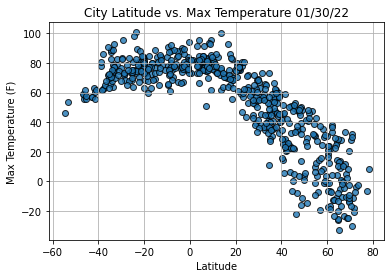

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

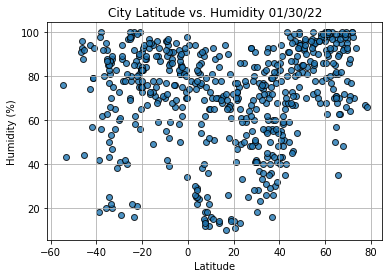

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

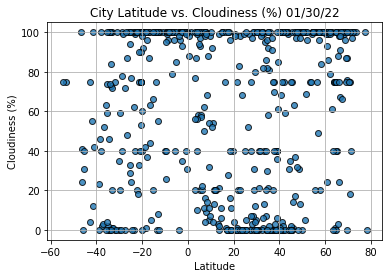

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

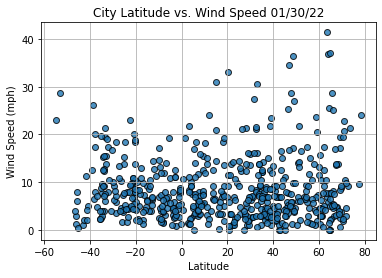

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(r_value)

In [20]:
#To create a new DataFrame from a current DataFrame, 
#we can use the loc method on the current DataFrame. 
#The loc method accesses a group of rows and columns 
#in the current DataFrame by an index, labels, or a Boolean array. The syntax to get a specific row from a current DataFrame is row = df.loc[row_index].
index13 = city_data_df.loc[13]
index13

City                      Mandera
Country                        KE
Date          2022-01-30 18:38:03
Lat                        3.9366
Lng                        41.867
Max Temp                    84.42
Humidity                       22
Cloudiness                    100
Wind Speed                  10.11
Name: 13, dtype: object

In [21]:
#filter a DataFrame based on a value of a row
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4       True
       ...  
567    False
568     True
569     True
570     True
571    False
Name: Lat, Length: 572, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Sovetskiy,RU,2022-01-30 18:37:59,61.3614,63.5842,-6.38,100,99,2.98
2,Bairiki,KI,2022-01-30 18:37:59,1.3292,172.9752,81.81,78,100,19.30
3,Upernavik,GL,2022-01-30 18:37:59,72.7868,-56.1549,-3.62,70,100,9.26
4,Albany,US,2022-01-30 18:38:00,42.6001,-73.9662,22.15,35,59,7.00
5,Nanortalik,GL,2022-01-30 18:38:00,60.1432,-45.2371,18.72,68,100,13.09


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

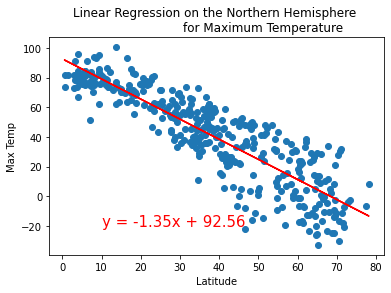

-0.8767915809818999


In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for Maximum Temperature', 'Max Temp',(10,-20))

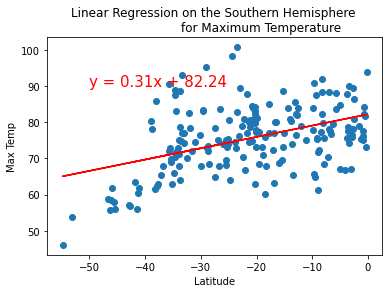

0.4411930313804269


In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for Maximum Temperature', 'Max Temp',(-50,90))

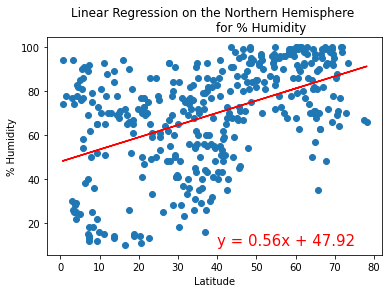

0.4759082111907469


In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for % Humidity', '% Humidity',(40,10))

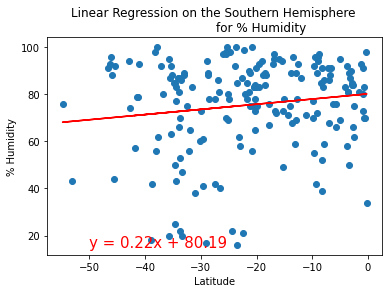

0.14478794045516402


In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for % Humidity', '% Humidity',(-50,15))

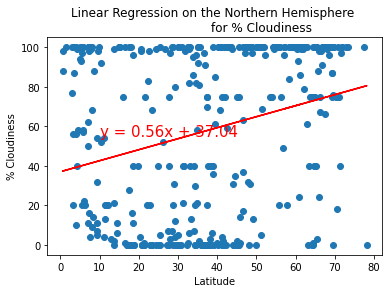

0.2703211316453431


In [28]:
# Linear regression on the Northern Hemisphere - cloudiness %
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for % Cloudiness', '% Cloudiness',(10,55))

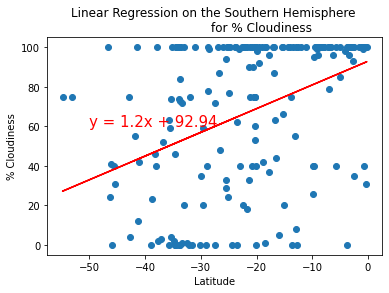

0.4101305291642632


In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for % Cloudiness', '% Cloudiness',(-50,60))

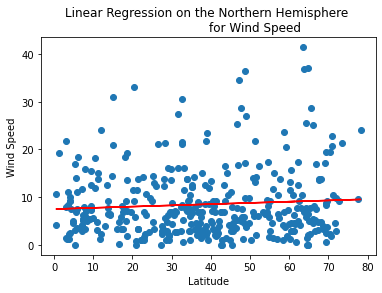

0.0733570594776725


In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for Wind Speed', 'Wind Speed',(10,50))

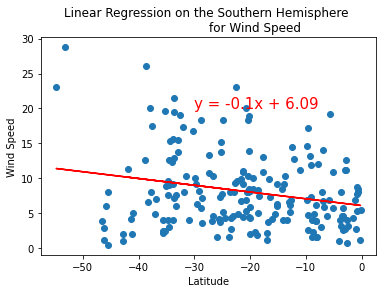

-0.23067351359548044


In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for Wind Speed', 'Wind Speed',(-30,20))

In [32]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [33]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Bairiki,KI,2022-01-30 18:37:59,1.3292,172.9752,81.81,78,100,19.30
7,Puerto Ayora,EC,2022-01-30 18:38:01,-0.7393,-90.3518,84.16,70,100,8.79
8,Hilo,US,2022-01-30 18:36:43,19.7297,-155.0900,75.61,72,40,6.91
11,Georgetown,MY,2022-01-30 18:38:02,5.4112,100.3354,82.89,90,20,0.00
13,Mandera,KE,2022-01-30 18:38:03,3.9366,41.8670,84.42,22,100,10.11
16,Atuona,PF,2022-01-30 18:38:04,-9.8000,-139.0333,77.81,77,26,14.65
18,Carnarvon,AU,2022-01-30 18:38:05,-24.8667,113.6333,80.67,78,77,18.41
20,Adrar,MR,2022-01-30 18:38:06,20.5022,-10.0711,79.72,11,99,9.28
21,Butaritari,KI,2022-01-30 18:38:06,3.0707,172.7902,81.64,77,77,21.81
23,Bowen,AU,2022-01-30 18:35:18,-20.0167,148.2333,77.22,91,40,8.21


In [34]:
preferred_cities_df.count()

City          161
Country       161
Date          161
Lat           161
Lng           161
Max Temp      161
Humidity      161
Cloudiness    161
Wind Speed    161
dtype: int64

In [35]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
2,Bairiki,KI,81.81,1.3292,172.9752,
7,Puerto Ayora,EC,84.16,-0.7393,-90.3518,
8,Hilo,US,75.61,19.7297,-155.0900,
11,Georgetown,MY,82.89,5.4112,100.3354,
13,Mandera,KE,84.42,3.9366,41.8670,
16,Atuona,PF,77.81,-9.8000,-139.0333,
18,Carnarvon,AU,80.67,-24.8667,113.6333,
20,Adrar,MR,79.72,20.5022,-10.0711,
21,Butaritari,KI,81.64,3.0707,172.7902,
23,Bowen,AU,77.22,-20.0167,148.2333,


In [36]:
# Set the parameters to search for a hotel in Paris.
params = {
    "radius": 5000,
    "types": "lodging",
    "key": g_key,
    "location": "48.8566, 2.3522"}
# Use base URL to search for hotels in Paris.
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
# Make request and get the JSON data from the search.
hotels = requests.get(base_url, params=params).json()

hotels

{'html_attributions': [],
 'next_page_token': 'Aap_uEClLb7rtK7_cMnjDJLTYG9YmMXhumIafbr44hUvjsy7nrwsXikFb_KETM1cElPAtbGB85PdpyzxF_m8RVQo22ECKAiyob39cMNpNWIubm2NHeJCJKnmAKr_T6qEDjPiXSk45zPVr-fi6MZbBWWu4AJ6BKAMSPODu1PCxwBd0IyN-HuY7i8d8o-UrrsgpP4yAPEeqG0Rq5k7oBodN44JmZ_miPBAWfBg6A0rxu_7_bx8VndGPPbnQihwxxTDJnEus8Nzbc4gE8GqEkNF11LJku9-RDiX7v8actnT-x0EFhUrMdh0GVm5MBYcHhVI0tFRYiZXxrRShIGXd8yyCGiS-Q3KmTTeMxv1mOtGXoAVxXxbxud6LbT1rI_jI6e1Yw9Y-i0kWzcVHy3pi4bq7MQ2i3VUXQKJiiWPDXxPy24W49CGOszR_DFqtZI',
 'results': [{'business_status': 'OPERATIONAL',
   'geometry': {'location': {'lat': 48.8581126, 'lng': 2.3529277},
    'viewport': {'northeast': {'lat': 48.8594360302915,
      'lng': 2.354355480291502},
     'southwest': {'lat': 48.8567380697085, 'lng': 2.351657519708498}}},
   'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/lodging-71.png',
   'icon_background_color': '#909CE1',
   'icon_mask_base_uri': 'https://maps.gstatic.com/mapfiles/place_api/icons/v2/hotel_pinlet',
   'name

In [37]:
len(hotels["results"])

20

In [38]:
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    
    # Grab the first hotel from the results and store the name.
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError):
        print("Hotel not found... skipping.")

Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.


In [39]:
hotel_df

,City,Country,Max Temp,Lat,Lng,Hotel Name
2,Bairiki,KI,81.81,1.3292,172.9752,Tarawa Boutique Hotel
7,Puerto Ayora,EC,84.16,-0.7393,-90.3518,Finch Bay Galapagos Hotel
8,Hilo,US,75.61,19.7297,-155.0900,Hilo Hawaiian Hotel
11,Georgetown,MY,82.89,5.4112,100.3354,Cititel Penang
13,Mandera,KE,84.42,3.9366,41.8670,Mwalimu Guest mandera
...,...,...,...,...,...,...
553,Roebourne,AU,84.65,-20.7833,117.1333,Latitude20 Roebourne Village
560,Coxim,BR,75.85,-18.5067,-54.7600,Hotel Avenida
561,Biak,ID,76.24,-0.9131,122.8766,Penginapan Kim
564,Male,MV,82.35,4.1748,73.5089,Hotel Octave Maldives


In [40]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [41]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""

In [42]:
# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

In [43]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))